# Association Rule Learning using the Apriori Algorithm

| **Key**          | Value                                                                                                               |
|:-----------------|:--------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                               |
| **Course Names** | BBT 4206: Business Intelligence II (Week 4-6 of 13) and BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13) |
| **Semester**     | April to July 2025                                                                                                  |
| **Lecturer**     | Allan Omondi                                                                                                        |
| **Contact**      | aomondi@strathmore.edu                                                                                              |
| **Note**         | The lecture contains both theory and practice. This notebook forms part of the practice.                            |

**Business context**: A supermarket chain seeks to uncover frequent item combinations from historical transactions to improve product placement, plan promotions, and increase cross-selling.

**Dataset**: A synthetic dataset of transactions, where each transaction is a list of items purchased together.

## Step 1: Import the necessary libraries

**Purpose of chunk**

This chunk sets up all necessary tools for:
- Data manipulation (pandas)
- Market basket analysis as part of association rule learning (mlxtend)
- Data visualization (matplotlib/seaborn)
- Clean output management (warnings)

1. **pandas (`pd`)**
    - 'Pandas' is essential because it is used for:
        - Loading the CSV data (`pd.read_csv()`)
        - Data manipulation and analysis
        - Creating and managing DataFrames
        - Essential for structured data analysis, e.g., `Group By` operations

2. **`mlxtend` components**
    - `apriori`: Implements the Apriori algorithm for finding frequent itemsets
    - `association_rules`: Generates rules from frequent itemsets
    - `TransactionEncoder`: Converts transaction data into a binary matrix format

3. **Visualization Libraries**
    - `matplotlib.pyplot`: Basic plotting library
    - `seaborn` : Advanced statistical visualization built on matplotlib `seaborn`
    - Provides enhanced plotting capabilities with better default styling

4. **Import Statement**
    - Imports Python's built-in `urllib.request` module which has the `urlopen` function
    - `urlopen`: Provides functionality to fetch data from URLs where the data is not presented in a CSV file format

5. **Warnings Management**
    - `warnings`: Python's warning control mechanism
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages

    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

1. **Data Loading Process**
    - Uses a context manager (`with` statement) for proper resource handling
    - Steps:
        1. Opens URL connection
        2. Reads binary content
        3. Decodes from bytes to UTF-8 string
        4. Splits into lines and processes each line

2. **Data Processing**
    - List comprehension transforms raw data into a structured format
    - Each transaction is processed by:
        - `strip()`: Removes whitespace
        - `split(',')`: Creates a list of items from comma-separated values

3. **Output**
    - Prints the total number of transactions
    - Shows the first three transactions as a sample


In [2]:
transactions = [
    ['pizza', 'soda', 'garlic bread'],
    ['pizza', 'fries', 'wine', 'soda'],
    ['pizza', 'fries', 'wine', 'ice cream'],
    ['soda', 'pizza', 'fries', 'wine'],
    ['soda', 'pizza', 'fries', 'ice cream']
]

print(f"Total number of transactions: {len(transactions)}")
print("\nFirst three transactions:")
transactions[:3]

Total number of transactions: 5

First three transactions:


[['pizza', 'soda', 'garlic bread'],
 ['pizza', 'fries', 'wine', 'soda'],
 ['pizza', 'fries', 'wine', 'ice cream']]

## Step 3: Convert the transaction list into a one-hot encoded DataFrame

**Purpose:**

The purpose of this chunk is to format the transaction data correctly. This is essential for:
- Running the Apriori algorithm
- Computing association rules
- Analyzing item frequencies and relationships

1. **Transaction Encoder Initialization**
    - Creates a new object `TransactionEncoder`
    - Purpose: To convert transaction lists into a binary matrix format

2. **Fit and Transform Process**
    - `encoder.fit(transactions)`:
        - Learns all unique items across all transactions
        - Creates a mapping of items to columns

    - `transform(transactions)`:
        - Converts transactions into a binary matrix
        - Each row represents one transaction
        - Each column represents one item
        - Values: True/False indicating item presence

3. **DataFrame Creation**
    - Converts the binary matrix into a `pandas` DataFrame
    - Uses `encoder.columns_` to retrieve the column names
    - Each column name is a unique item
    - Each row shows items present (True) or absent (False)

4. **Data Preview**
    - `transaction_data.head()`: Shows first five rows of transformed data

**Example:**
If the original transactions were:
```
Transaction 1: ["milk", "bread"]
Transaction 2: ["bread", "butter"]
```
The transformed data would look like this:
```
   milk  bread  butter
0  True   True  False
1  False  True   True
```

In [3]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(onehot, columns=encoder.columns_)
transaction_data.head()

,fries,garlic bread,ice cream,pizza,soda,wine
0,False,True,False,True,True,False
1,True,False,False,True,True,True
2,True,False,True,True,False,True
3,True,False,False,True,True,True
4,True,False,True,True,True,False


## Step 4: Generate frequent itemsets using the Apriori algorithm

1. **Apriori Algorithm Application**
    - Function: `apriori()`
    - Parameters:
        - `transaction_data`: Binary encoded transaction matrix
        - `min_support=0.02`: Minimum support threshold (2%)
        - `use_colnames=True`: Use item names instead of indices

2. **Support Threshold**
    - Support = (frequency of itemset) / (total transactions)
    - 0.02 means items/sets must appear in at least 2% of transactions
    - Helps filter out rare combinations

3. **Result Generation**
    - Creates a DataFrame containing:
        - `itemsets`: Combinations of items
        - `support`: Frequency of occurrence

4. **Result Processing**
    - `sort_values(by='support', ascending=False)`: Orders by support value (highest first)
    - `head(10)`: Shows top 10 most frequent itemsets


In [4]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
3,1.0,(pizza)
4,0.8,(soda)
0,0.8,(fries)
7,0.8,"(pizza, fries)"
15,0.8,"(soda, pizza)"
8,0.6,"(soda, fries)"
5,0.6,(wine)
22,0.6,"(wine, pizza, fries)"
21,0.6,"(soda, pizza, fries)"
16,0.6,"(wine, pizza)"


## Step 5: Generate and display the association rules

1. **Rules Generation**
    - Function: `association_rules()`
    - Input: `frequent_itemsets` from Apriori algorithm
    - Parameters:
        - `metric='lift'`: Measure of rule interestingness
        - `min_threshold=1.0`: Minimum lift value to include

2. **Key Metrics**
    - `antecedents`: "If" part of the rule (items in a basket)
    - `consequents`: "Then" part of the rule (likely additional items)
    - `support`: Frequency of items appearing together
    - `confidence`: Probability of consequent given antecedent
    - `lift`: Ratio of observed support to expected support

3. **Sorting and Display**
    - Sorts rules by confidence (highest first)
    - Shows the top 15 strongest associations
    - Displays most relevant columns for analysis


In [5]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

### Display the top 10 rules sorted by confidence

In [6]:
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(ice cream),(fries),0.4,1.0,1.25
3,(fries),(pizza),0.8,1.0,1.00
6,(garlic bread),(pizza),0.2,1.0,1.00
4,(wine),(fries),0.6,1.0,1.25
12,(soda),(pizza),0.8,1.0,1.00
14,(wine),(pizza),0.6,1.0,1.00
10,(ice cream),(pizza),0.4,1.0,1.00
8,(garlic bread),(soda),0.2,1.0,1.25
56,"(ice cream, wine, pizza)",(fries),0.2,1.0,1.25
50,"(ice cream, soda, pizza)",(fries),0.2,1.0,1.25


### Display the top 10 rules sorted by lift and then confidence

In [7]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(ice cream),(fries),0.4,1.0,1.25
4,(wine),(fries),0.6,1.0,1.25
8,(garlic bread),(soda),0.2,1.0,1.25
56,"(ice cream, wine, pizza)",(fries),0.2,1.0,1.25
50,"(ice cream, soda, pizza)",(fries),0.2,1.0,1.25
20,(ice cream),"(pizza, fries)",0.4,1.0,1.25
22,"(soda, ice cream)",(fries),0.2,1.0,1.25
16,"(ice cream, pizza)",(fries),0.4,1.0,1.25
34,"(wine, soda)",(fries),0.4,1.0,1.25
39,"(garlic bread, pizza)",(soda),0.2,1.0,1.25


### Filter the rules to show only those with high confidence and high lift

In [8]:
strong_rules = rules[
    (rules['confidence'] >= 0.8) &
    (rules['lift'] >= 1.2)
].sort_values(by='confidence', ascending=False)
strong_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(ice cream),(fries),0.4,1.0,1.25
4,(wine),(fries),0.6,1.0,1.25
8,(garlic bread),(soda),0.2,1.0,1.25
56,"(ice cream, wine, pizza)",(fries),0.2,1.0,1.25
50,"(ice cream, soda, pizza)",(fries),0.2,1.0,1.25
20,(ice cream),"(pizza, fries)",0.4,1.0,1.25
22,"(soda, ice cream)",(fries),0.2,1.0,1.25
16,"(ice cream, pizza)",(fries),0.4,1.0,1.25
34,"(wine, soda)",(fries),0.4,1.0,1.25
39,"(garlic bread, pizza)",(soda),0.2,1.0,1.25


## Step 6. Visualize rules

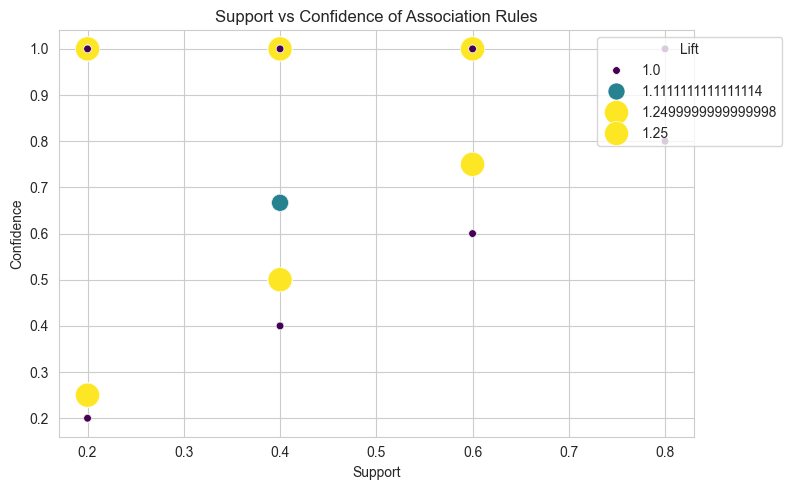

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

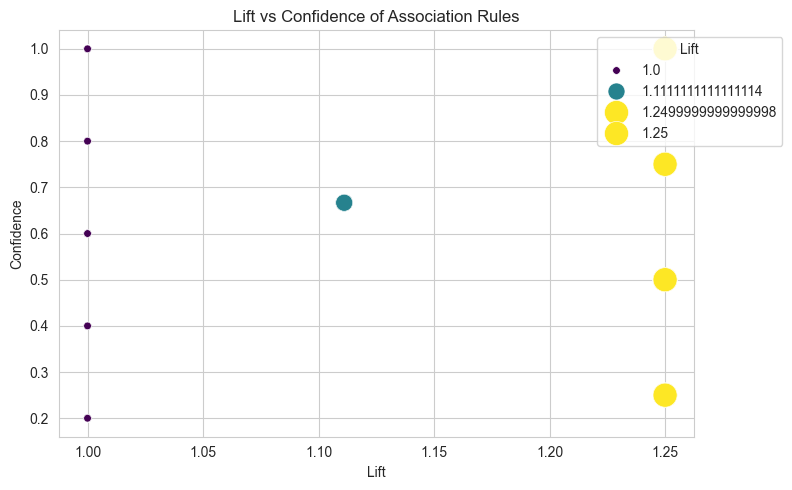

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='lift', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

## Step 7. Business Analysis
- `(ice cream) → (fries)` and `(wine) → (fries)` provide actionable insights for store layout, website layout, and promotions.
- High lift values suggest strong associations which can guide bundling decisions.
- Regular analysis of basket data helps optimize product placement and increase average basket size.

# References
Hahsler, M., Chelluboina, S., Hornik, K., & Buchta, C. (2011). The arules R-Package Ecosystem: Analyzing Interesting Patterns from Large Transaction Datasets. Journal of Machine Learning Research, 12, 1977–1981.
